# Angelina Dubrule

## Research question/interests

**Which state in our dataset has the most affordable mortgage? Which state has the least?**

We can answer this question by averaging the affordability over the 17 year time span (1999-2016) for each row in the graph. Then we could compare this to each RegionName by removing all other columns. We can then combine the repeated data from the same state multiple times by averaging the repeated terms. Once there are only two columns, average affordability and Region Name, we can order the terms by lowest to hishest affordability. The first Region Name term will be the most affordable, and the last will be the least.

**Has the affordability of a mortgage changed over the 17 year period that the data was collected? If so, did affordability increase or decrease?**

We can answer this question by removing all data columns from the table except for the affordability calculation columns. Find the average for each quarter by finding the average for each column using all rows. There should now be only two rows, the date of data collecton and the average affordability. We can then plot a graph showing the average affordability over time, and see if there are any trends.

**Is there any correlation between tier level and affordability? If so, is as as expected with higher tier levels having lower affordability?

We can answer this question by removing all columns that are not numerical, and then group by tier and average the values. We can then either plot a graph based on all of the data, or simplify the data by averaging the affordability values by year, or even averaging the affordability values over all time.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import sys
sys.path.append('./code') 
import project_functions_angelina as fun

## Analysis Pipeline
### Load and Clean Data

In [ ]:
#Preliminary Data Processing
raw ='../data/raw/TieredAffordability_Mortgage.csv'
df = fun.cleand(raw)
#check for null values
fun.isNull(df)
#check for duplicates
fun.isDup(df)

No null values found
No duplicated entries found


### Process and Wrangle Data

In [ ]:
#average affordability
aot = fun.avgOverTime(df)

#affordability by year
aby = fun.affByYear(df)

/Users/wgarbutt/Documents/Documents_thismac/third_year/data_301/project-group-therealgroup30/analysis/./code/project_functions_angelina.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(df.Year.dt.year).mean().reset_index()


### EDA

In [ ]:
#Exploratory Data Analysis Part 1
df1 = fun.getGeoLoc(fun.gbState(fun.removePeriodCol(aot)))
df1.head()

,RegionName,PopRank,Affordability(1999-2016),Latitude,Longitude
0,AL,48.000000,0.159181,32.318230,-86.902298
1,AZ,14.000000,0.228479,32.788891,-92.957779
2,CA,16.833333,0.432776,36.778259,-119.417931
3,CO,21.000000,0.252021,39.550053,-105.782066
4,CT,43.000000,0.226595,41.500751,-72.757378


In [ ]:
#Exploratory Data Analysis Part 2
df2 = fun.affCompYear(aby, 0)
df2.head()

,Year,Mortgage Affordability,Affordability Compared to 1999
0,1999,0.229342,Same Affordability
1,2000,0.253782,Less Affordable
2,2001,0.245574,Less Affordable
3,2002,0.247973,Less Affordable
4,2003,0.247143,Less Affordable


In [ ]:
#Exploratory Data Analysis Part 3
df3 = fun.gbPop(fun.gbState(fun.removePeriodCol(aot)))
df3.head()

/Users/wgarbutt/Documents/Documents_thismac/third_year/data_301/project-group-therealgroup30/analysis/./code/project_functions_angelina.py:170: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('PopRank').mean().reset_index()


,PopRank,Affordability(1999-2016)
0,0.0,0.208573
1,3.0,0.227440
2,4.0,0.155661
3,7.0,0.236430
4,9.0,0.173411


In [ ]:
#Export Processed Data
from pathlib import Path  

filepath = Path('../data/processed/affordability_by_year.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df2.to_csv(filepath) 

filepath = Path('../data/processed/affordability_by_state.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df1.to_csv(filepath)

filepath = Path('../data/processed/affordability_by_pop.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df3.to_csv(filepath)

In [ ]:
#Data Visualization 1
fig = px.choropleth(df1,
                    locations='RegionName', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Affordability(1999-2016)',
                    color_continuous_scale="sunset_r",
                    )
fig.update_layout(
      title_text = 'Average Mortgage Affordability by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )
fig.show()

California looks to be the least affordable state.

In [ ]:
#Data Visualization 2
fig = px.choropleth(df1,
                    locations='RegionName', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='PopRank',
                    color_continuous_scale="Viridis",
                    labels={'PopRank': 'Population Rank'}
                    )
fig.update_layout(
      title_text = 'Population of Chosen City for each State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )
fig.show()

Texas looks to be the state with one of the most highly populated cities chosen for data collection.

<matplotlib.legend.Legend>

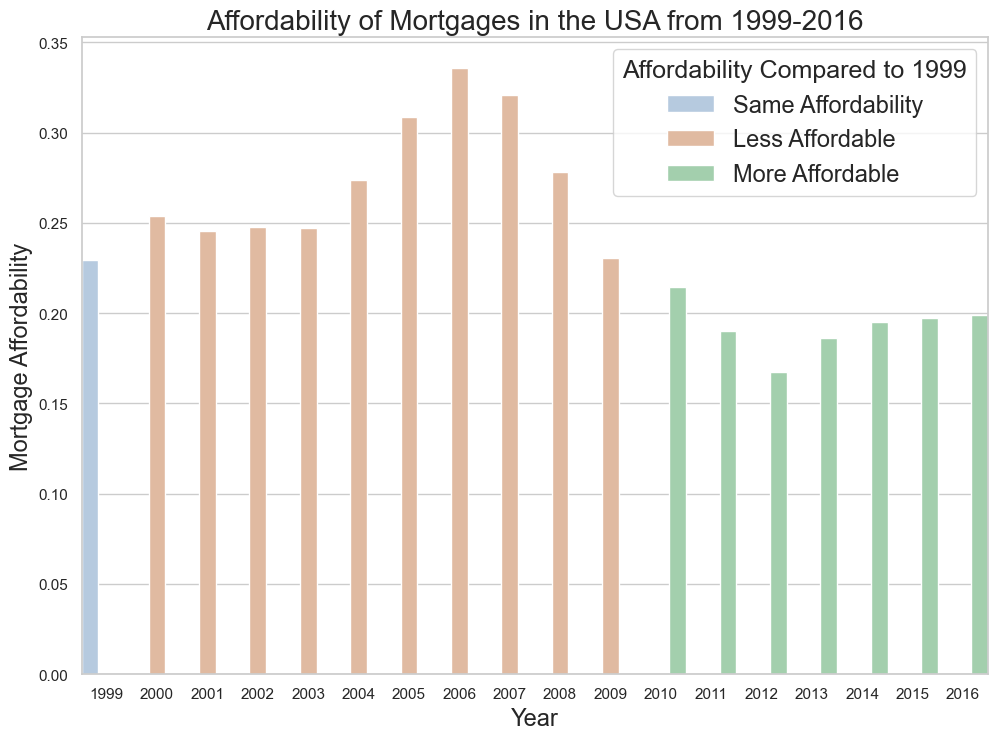

In [ ]:
#Data Visualization 3
sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27), 'font.size':10, 'axes.titlesize':20, 'axes.labelsize':17})
sns.barplot(data=df2, x='Year', y='Mortgage Affordability', hue='Affordability Compared to 1999', saturation=0.5, width = 1, palette='pastel').set(title = "Affordability of Mortgages in the USA from 1999-2016")
plt.legend(title="Affordability Compared to 1999", fontsize=17, title_fontsize=18)

Affordability seems to have changed a lot over time. It peaked as least affordable in 2006, and then decreased with the most affordable mortgage in 2012. 

<AxesSubplot:xlabel='PopRank', ylabel='Affordability(1999-2016)'>

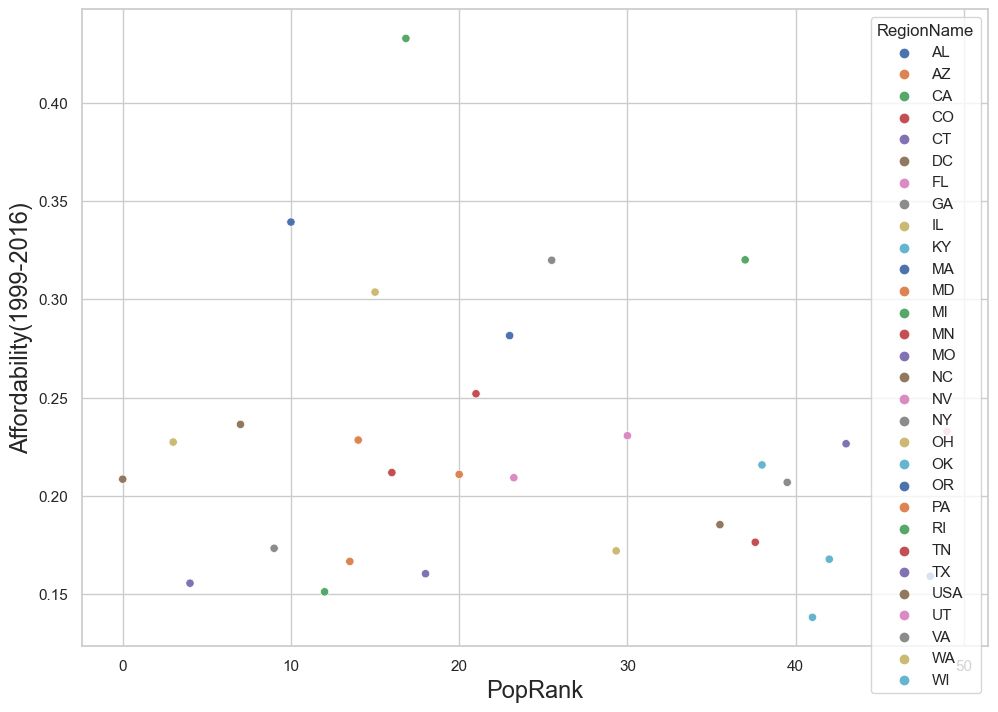

In [ ]:
#Data Visualization 4
sns.scatterplot(data=df1, x='PopRank', y='Affordability(1999-2016)', hue='RegionName', palette= 'deep')

There does not seem to be any correlation between mortgage affordability and population based on our data.

### Data Analysis
#### Question 1 - Which state in our dataset has the most affordable mortgage? Which state has the least?
In the exploratoy data analysis stage, we were able to use our choropleth graph to visualize the affordability of a mortgage by state. Let's revisit that visualization now.

In [ ]:
fig = px.choropleth(df1,
                    locations='RegionName', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Affordability(1999-2016)',
                    color_continuous_scale="sunset",
                    )
fig.update_layout(
      title_text = 'Average Mortgage Affordability by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )
fig.show()

#### Observations
In revisting the choropleth, we can see that there is a significant difference in mortagage affordability accross different states in the US. We can see that California and New York have the lowest affordability, while Oklahoma and Michigan have the highest affordability. Let's try another visualization to narrow down our findings.

<AxesSubplot:xlabel='Affordability(1999-2016)', ylabel='RegionName'>

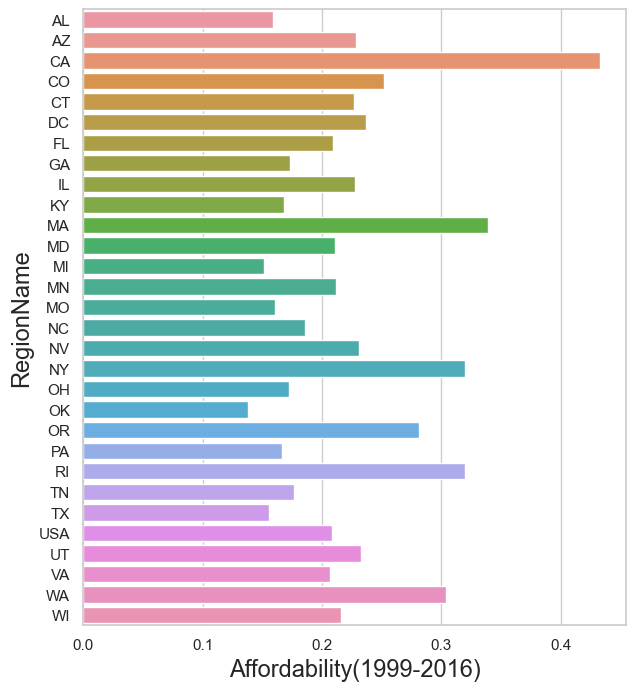

In [ ]:
sns.set(style="whitegrid", rc={'figure.figsize':(7,8), 'font.size':10, 'axes.titlesize':20, 'axes.labelsize':17})
sns.barplot(data=df1, x='Affordability(1999-2016)', y='RegionName', orient='h')

#### Observations
Our second visualization is a bar graph that compares each states average affordability over the time period that the data was collected. Again, we can clearly see that affordability varies greatly depending on state. This visualization also shows us more clearly that California is the least affordable state, but it is still hard to tell which state is the least affordable.

<matplotlib.legend.Legend>

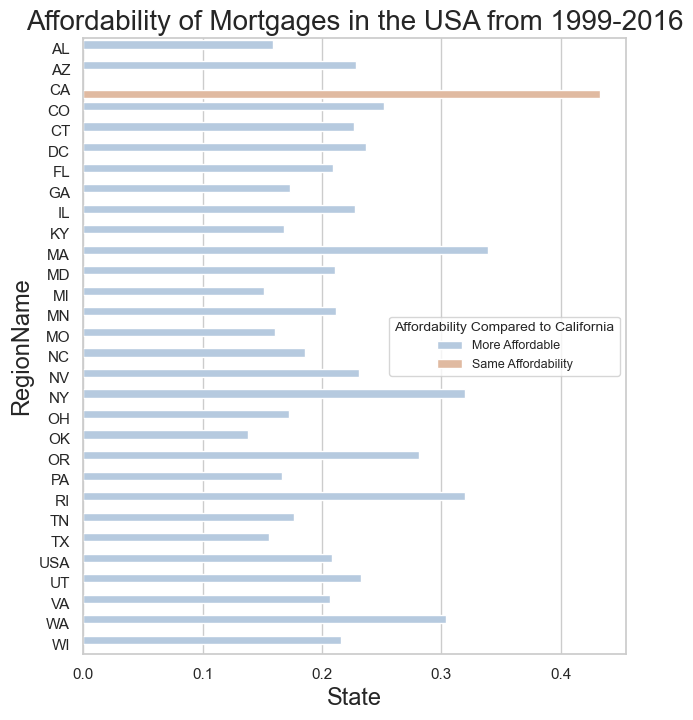

In [ ]:
df1 = fun.affCompState(df1, 2)
sns.barplot(data=df1, x='Affordability(1999-2016)', y='RegionName', orient='h', hue='Affordability Compared to CA', palette='pastel', saturation=0.5).set(title = "Affordability of Mortgages in the USA from 1999-2016", xlabel='State')
plt.legend(title="Affordability Compared to California", fontsize=9, title_fontsize=10)

#### Observations
Our third visualization is a bar graph that compares each states average affordability over the time period that the data was collected. Each bar is also colored to show whether it is more affordabile, less affordable, or the same level of affordability as California. It is now indesputable that California is in fact the least affordable state, but what about our most affordable?

<matplotlib.legend.Legend>

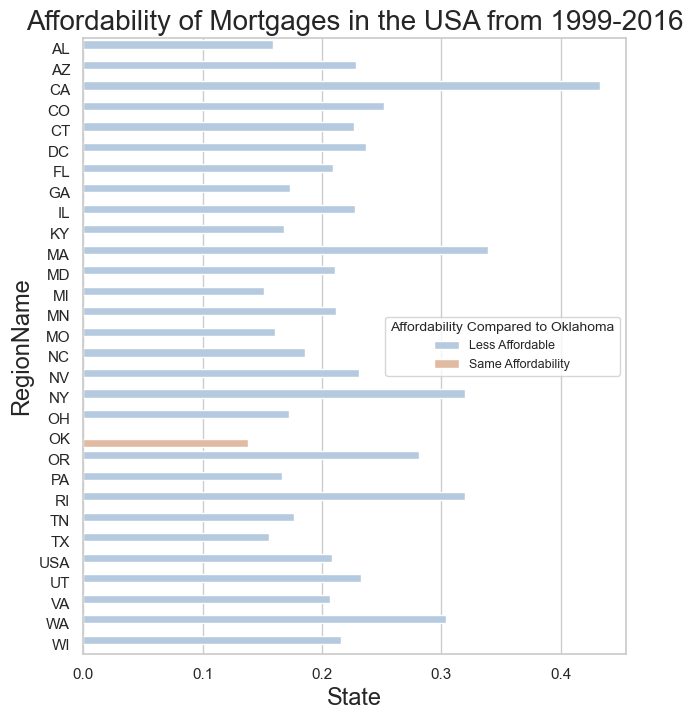

In [ ]:
df1 = fun.affCompState(df1.drop(['Affordability Compared to CA'], axis=1), 19)
sns.barplot(data=df1, x='Affordability(1999-2016)', y='RegionName', orient='h', hue='Affordability Compared to OK', palette='pastel', saturation=0.5).set(title = "Affordability of Mortgages in the USA from 1999-2016", xlabel='State')
plt.legend(title="Affordability Compared to Oklahoma", fontsize=9, title_fontsize=10)

#### Observations
Our fourth visualization is the same bar graph, but this time each bar is colored to show whether it is more affordabile, less affordable, or the same level of affordability as Oklahoma. It is clear to see in this visualization that Oklahoma is in fact the most affordable state.

#### Conclusion
From our observations, we can conclude that the state that the mortgage is taken out in has a large affect on the affordability of the mortgage, as our average values for mortgage affordability over a span of 17 years vary greatly from state to state. We can also conclude that California is the state with the least affordable mortgage, and that Oklahoma is the state with the most affordable mortgage.

#### Question 2 - Has the affordability of a mortgage changed over the 17 year period that the data was collected? If so, did affordability increase or decrease?
In the exploratoy data analysis stage, we were able to use a bar graph to visualize the average mortgage affordability for each year. Let's revisit that visualization.

<matplotlib.legend.Legend>

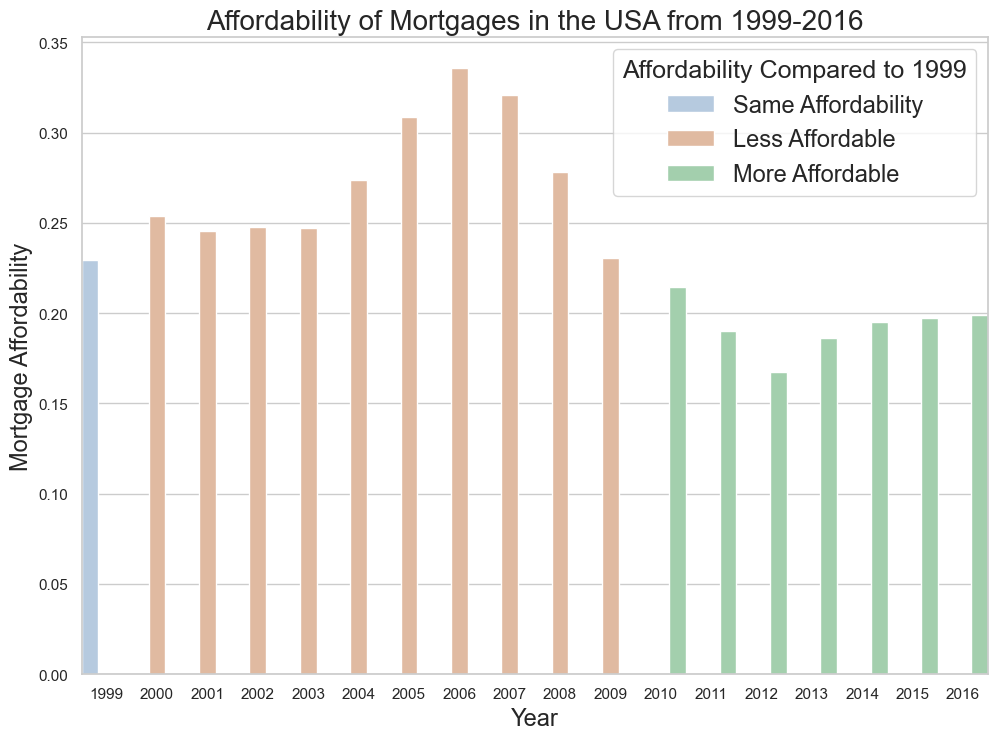

In [ ]:
sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27), 'font.size':10, 'axes.titlesize':20, 'axes.labelsize':17})
sns.barplot(data=df2, x='Year', y='Mortgage Affordability', hue='Affordability Compared to 1999', saturation=0.5, width = 1, palette='pastel').set(title = "Affordability of Mortgages in the USA from 1999-2016")
plt.legend(title="Affordability Compared to 1999", fontsize=17, title_fontsize=18)

#### Observations
In looking at our graph, we can see that affordability has changed quite a lot over the years that our dat was collected. However, it is hard to tell whether or not mortgages have become more or less affordabile over the entire time period. Let's try another visualization.

<AxesSubplot:xlabel='Year', ylabel='Mortgage Affordability'>

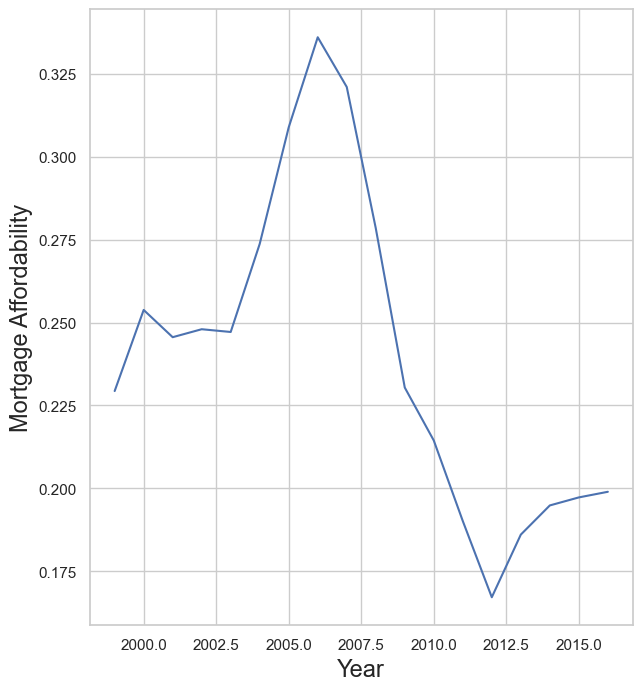

In [ ]:
sns.set(style="whitegrid", rc={'figure.figsize':(7,8), 'font.size':10, 'axes.titlesize':20, 'axes.labelsize':17})
sns.lineplot(x="Year", y="Mortgage Affordability", data=df2)

#### Observations
In our second visualization, we can again see that affordability varies greatly over our 17 year period. The line plot shows a large decrease in affordability peaking at 2006, and then a large increase in affordability peaking at 2012. It is still not easy to tell whether the graph trend is increasing or decreasing in affordability overall.

<seaborn.axisgrid.FacetGrid>

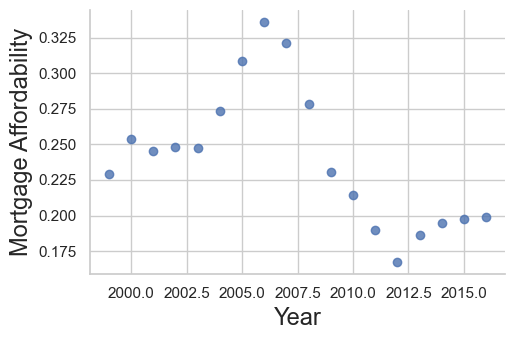

In [ ]:
sns.lmplot(data=df2, x='Year', y='Mortgage Affordability', fit_reg=False, height=3.5, aspect=1.5)

#### Observations
Out third visualization is very similar to our second one, however using a scatterplot makes it easier to see each year on the graph, and shows a more accurate representation of our graph.

<seaborn.axisgrid.FacetGrid>

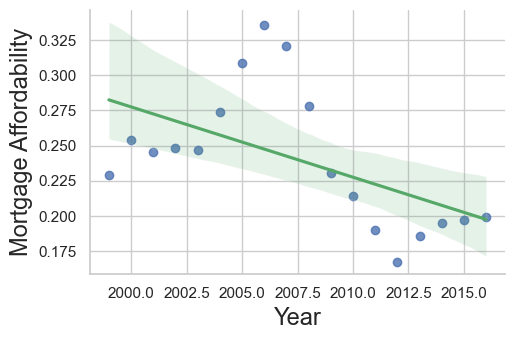

In [ ]:
sns.lmplot(data=df2, x='Year', y='Mortgage Affordability', line_kws={'color': 'g'}, height=3.5, aspect=1.5)

#### Observations
Our final visualization is the same as our third visualization, however it now includes a line of regression. The line shows a clear trend in our data, and we can now see that the affordability is increasing over our time period. This visualization also shows our original data plots, so we can still se he variations in affordability over time.

#### Conclusion
From our observations, we can conclude that the affordability of a mortgage in accross the USA varies greatly over time. We can also conclude that in our 17 year time period, mortgage affordability follows an overall trend of becoming increasingly affordable.